# Import packages

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import warnings
warnings.filterwarnings('ignore')

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sb

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("./data"))

# Any results you write to the current directory are saved as output.

['ambient_temperature_system_failure.csv', 'DTW data_HN19_24RC_2차_송부용_20210712.xlsx', 'kmeans_results.xlsx', 'Superstore.csv', 'anomaly types.jpg', 'breast-cancer-wisconsin.txt', 'Sales_Transactions_Dataset_Weekly.csv']


# Import data

In [3]:
data  = pd.read_csv('./data/Sales_Transactions_Dataset_Weekly.csv')

# Have a look

In [4]:
data.head()

,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
0,P1,11,12,10,8,13,12,14,21,6,...,0.06,0.22,0.28,0.39,0.50,0.00,0.22,0.17,0.11,0.39
1,P2,7,6,3,2,7,1,6,3,3,...,0.20,0.40,0.50,0.10,0.10,0.40,0.50,0.10,0.60,0.00
2,P3,7,11,8,9,10,8,7,13,12,...,0.27,1.00,0.18,0.18,0.36,0.45,1.00,0.45,0.45,0.36
3,P4,12,8,13,5,9,6,9,13,13,...,0.41,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29,0.35
4,P5,8,5,13,11,6,7,9,14,9,...,0.27,0.53,0.27,0.60,0.20,0.20,0.13,0.53,0.33,0.40


In [5]:
data.describe()

,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
count,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,...,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.00000,811.000000,811.000000,811.000000
mean,8.902589,9.129470,9.389642,9.717633,9.574599,9.466091,9.720099,9.585697,9.784217,9.681874,...,0.299149,0.287571,0.304846,0.316017,0.334760,0.314636,0.33815,0.358903,0.373009,0.427941
std,12.067163,12.564766,13.045073,13.553294,13.095765,12.823195,13.347375,13.049138,13.550237,13.137916,...,0.266993,0.256630,0.263396,0.262226,0.275203,0.266029,0.27569,0.286665,0.295197,0.342360
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.020000,0.085000,0.000000,0.10500,0.100000,0.110000,0.090000
50%,3.000000,3.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,...,0.280000,0.270000,0.300000,0.310000,0.330000,0.310000,0.33000,0.330000,0.350000,0.430000
75%,12.000000,12.000000,12.000000,13.000000,13.000000,12.500000,13.000000,12.500000,13.000000,13.000000,...,0.490000,0.450000,0.500000,0.500000,0.500000,0.500000,0.50000,0.550000,0.560000,0.670000
max,54.000000,53.000000,56.000000,59.000000,61.000000,52.000000,56.000000,62.000000,63.000000,52.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [6]:
data

,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
0,P1,11,12,10,8,13,12,14,21,6,...,0.06,0.22,0.28,0.39,0.50,0.00,0.22,0.17,0.11,0.39
1,P2,7,6,3,2,7,1,6,3,3,...,0.20,0.40,0.50,0.10,0.10,0.40,0.50,0.10,0.60,0.00
2,P3,7,11,8,9,10,8,7,13,12,...,0.27,1.00,0.18,0.18,0.36,0.45,1.00,0.45,0.45,0.36
3,P4,12,8,13,5,9,6,9,13,13,...,0.41,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29,0.35
4,P5,8,5,13,11,6,7,9,14,9,...,0.27,0.53,0.27,0.60,0.20,0.20,0.13,0.53,0.33,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,P815,0,0,1,0,0,2,1,0,0,...,0.00,0.33,0.33,0.00,0.00,0.33,0.00,0.00,0.67,0.00
807,P816,0,1,0,0,1,2,2,6,0,...,0.43,0.43,0.57,0.29,0.57,0.71,0.71,0.71,0.86,0.71
808,P817,1,0,0,0,1,1,2,1,1,...,0.50,0.00,0.00,0.50,0.50,0.00,0.00,0.00,1.00,0.75
809,P818,0,0,0,1,0,0,0,0,1,...,0.00,0.00,0.00,0.50,0.50,0.00,0.00,0.00,1.00,0.00


No obvious indications of bad or missing values here. We could just have a look at the whole frame, since it's just 811 rows, but that's not really a scaleable approach. 
What we're mainly looking for are null values, like NaN, etc. Pandas lets us search those via the 'isnull()' method.


In [7]:
data.isnull().values.any()

False

It seems like this particular data set doesn't have any missing values. That's not to say there isn't any noise in the data, just that none of the elements are undefined.

We may have to exclude other data points later, depending on the exact goals of the analysis. I.e. what do we do with products which have flat sales throughout the year?

# General approach

First we'll put together a rough method for finding groups of products that are more related to one another.   
In other words, we want to know which products have similar sales patterns, even if they're from completely different categories. 
As for the time scale: to start with, we'll just look at the overall pattern over the year for which we have data. A potential challenge is that with such a limited data set, we only have one example per calendar day. It may be hard to separate seasonal, monthly, weekly patterns from noise.

# Feature selection
Having had a look at the columns above, we see that there's product counts per week as well normalized sales. Without making any assumptions on the types of products in the list, we don't know that the per-item sales counts are a valid way to compare products. Some products tend to be purchased several at a time, while others only one at a time. We'll consider that their relative variations are more important, and keep only the normalized columns for now.

NOTE: An alternative way to look at this problem, is to think of the weeks of the year as the data points, and the products as features. We may have to give this a try later.

In [9]:
data_norm = data.copy()

data_norm[['Normalized {}'.format(i) for i in range(0,52)]].head()
data[[i for i in data.columns if i.find('Nor') == 0]].head()

,Normalized 0,Normalized 1,Normalized 2,Normalized 3,Normalized 4,Normalized 5,Normalized 6,Normalized 7,Normalized 8,Normalized 9,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
0,0.44,0.50,0.39,0.28,0.56,0.50,0.61,1.00,0.17,0.61,...,0.06,0.22,0.28,0.39,0.50,0.00,0.22,0.17,0.11,0.39
1,0.70,0.60,0.30,0.20,0.70,0.10,0.60,0.30,0.30,0.30,...,0.20,0.40,0.50,0.10,0.10,0.40,0.50,0.10,0.60,0.00
2,0.36,0.73,0.45,0.55,0.64,0.45,0.36,0.91,0.82,0.27,...,0.27,1.00,0.18,0.18,0.36,0.45,1.00,0.45,0.45,0.36
3,0.59,0.35,0.65,0.18,0.41,0.24,0.41,0.65,0.65,0.53,...,0.41,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29,0.35
4,0.33,0.13,0.67,0.53,0.20,0.27,0.40,0.73,0.40,0.40,...,0.27,0.53,0.27,0.60,0.20,0.20,0.13,0.53,0.33,0.40


,Normalized 0,Normalized 1,Normalized 2,Normalized 3,Normalized 4,Normalized 5,Normalized 6,Normalized 7,Normalized 8,Normalized 9,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
0,0.44,0.50,0.39,0.28,0.56,0.50,0.61,1.00,0.17,0.61,...,0.06,0.22,0.28,0.39,0.50,0.00,0.22,0.17,0.11,0.39
1,0.70,0.60,0.30,0.20,0.70,0.10,0.60,0.30,0.30,0.30,...,0.20,0.40,0.50,0.10,0.10,0.40,0.50,0.10,0.60,0.00
2,0.36,0.73,0.45,0.55,0.64,0.45,0.36,0.91,0.82,0.27,...,0.27,1.00,0.18,0.18,0.36,0.45,1.00,0.45,0.45,0.36
3,0.59,0.35,0.65,0.18,0.41,0.24,0.41,0.65,0.65,0.53,...,0.41,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29,0.35
4,0.33,0.13,0.67,0.53,0.20,0.27,0.40,0.73,0.40,0.40,...,0.27,0.53,0.27,0.60,0.20,0.20,0.13,0.53,0.33,0.40


In [10]:
data_norm = data[[i for i in data.columns if i.find('Nor') == 0]]

In [11]:
data_norm.head()

,Normalized 0,Normalized 1,Normalized 2,Normalized 3,Normalized 4,Normalized 5,Normalized 6,Normalized 7,Normalized 8,Normalized 9,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
0,0.44,0.50,0.39,0.28,0.56,0.50,0.61,1.00,0.17,0.61,...,0.06,0.22,0.28,0.39,0.50,0.00,0.22,0.17,0.11,0.39
1,0.70,0.60,0.30,0.20,0.70,0.10,0.60,0.30,0.30,0.30,...,0.20,0.40,0.50,0.10,0.10,0.40,0.50,0.10,0.60,0.00
2,0.36,0.73,0.45,0.55,0.64,0.45,0.36,0.91,0.82,0.27,...,0.27,1.00,0.18,0.18,0.36,0.45,1.00,0.45,0.45,0.36
3,0.59,0.35,0.65,0.18,0.41,0.24,0.41,0.65,0.65,0.53,...,0.41,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29,0.35
4,0.33,0.13,0.67,0.53,0.20,0.27,0.40,0.73,0.40,0.40,...,0.27,0.53,0.27,0.60,0.20,0.20,0.13,0.53,0.33,0.40


# Weekly sales differences ("velocities")
To understand of products are related, we probably want to know if their sales vary together week to week. 
To approach this question, it might be helpful to calculate the "sales velocites", or the difference matrix showing how much the sales went up or down in each week. The assumption is that products with similar sales fluctuations are similar, and should be restocked around the same time.

NOTE: In reality, this should be subject to constraints on the restock-order volume, and frequency.

In [12]:
data_norm.diff(axis=1).head()

,Normalized 0,Normalized 1,Normalized 2,Normalized 3,Normalized 4,Normalized 5,Normalized 6,Normalized 7,Normalized 8,Normalized 9,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
0,NaN,0.06,-0.11,-0.11,0.28,-0.06,0.11,0.39,-0.83,0.44,...,-0.38,0.16,0.06,0.11,0.11,-0.50,0.22,-0.05,-0.06,0.28
1,NaN,-0.10,-0.30,-0.10,0.50,-0.60,0.50,-0.30,0.00,0.00,...,-0.30,0.20,0.10,-0.40,0.00,0.30,0.10,-0.40,0.50,-0.60
2,NaN,0.37,-0.28,0.10,0.09,-0.19,-0.09,0.55,-0.09,-0.55,...,0.09,0.73,-0.82,0.00,0.18,0.09,0.55,-0.55,0.00,-0.09
3,NaN,-0.24,0.30,-0.47,0.23,-0.17,0.17,0.24,0.00,-0.12,...,0.17,0.06,-0.41,0.06,0.12,0.11,0.36,-0.36,-0.06,0.06
4,NaN,-0.20,0.54,-0.14,-0.33,0.07,0.13,0.33,-0.33,0.00,...,-0.06,0.26,-0.26,0.33,-0.40,0.00,-0.07,0.40,-0.20,0.07


Next we drop the now nonsense first column- we don't have data before the first week of the year, so the first difference is undefined.

In [13]:
data_norm_diff = data_norm.diff(axis=1).drop('Normalized 0', axis=1).copy()

In [14]:
data_norm_diff.head()

,Normalized 1,Normalized 2,Normalized 3,Normalized 4,Normalized 5,Normalized 6,Normalized 7,Normalized 8,Normalized 9,Normalized 10,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
0,0.06,-0.11,-0.11,0.28,-0.06,0.11,0.39,-0.83,0.44,-0.17,...,-0.38,0.16,0.06,0.11,0.11,-0.50,0.22,-0.05,-0.06,0.28
1,-0.10,-0.30,-0.10,0.50,-0.60,0.50,-0.30,0.00,0.00,-0.10,...,-0.30,0.20,0.10,-0.40,0.00,0.30,0.10,-0.40,0.50,-0.60
2,0.37,-0.28,0.10,0.09,-0.19,-0.09,0.55,-0.09,-0.55,0.73,...,0.09,0.73,-0.82,0.00,0.18,0.09,0.55,-0.55,0.00,-0.09
3,-0.24,0.30,-0.47,0.23,-0.17,0.17,0.24,0.00,-0.12,-0.18,...,0.17,0.06,-0.41,0.06,0.12,0.11,0.36,-0.36,-0.06,0.06
4,-0.20,0.54,-0.14,-0.33,0.07,0.13,0.33,-0.33,0.00,0.13,...,-0.06,0.26,-0.26,0.33,-0.40,0.00,-0.07,0.40,-0.20,0.07


In [15]:
data_norm_diff.head()

,Normalized 1,Normalized 2,Normalized 3,Normalized 4,Normalized 5,Normalized 6,Normalized 7,Normalized 8,Normalized 9,Normalized 10,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
0,0.06,-0.11,-0.11,0.28,-0.06,0.11,0.39,-0.83,0.44,-0.17,...,-0.38,0.16,0.06,0.11,0.11,-0.50,0.22,-0.05,-0.06,0.28
1,-0.10,-0.30,-0.10,0.50,-0.60,0.50,-0.30,0.00,0.00,-0.10,...,-0.30,0.20,0.10,-0.40,0.00,0.30,0.10,-0.40,0.50,-0.60
2,0.37,-0.28,0.10,0.09,-0.19,-0.09,0.55,-0.09,-0.55,0.73,...,0.09,0.73,-0.82,0.00,0.18,0.09,0.55,-0.55,0.00,-0.09
3,-0.24,0.30,-0.47,0.23,-0.17,0.17,0.24,0.00,-0.12,-0.18,...,0.17,0.06,-0.41,0.06,0.12,0.11,0.36,-0.36,-0.06,0.06
4,-0.20,0.54,-0.14,-0.33,0.07,0.13,0.33,-0.33,0.00,0.13,...,-0.06,0.26,-0.26,0.33,-0.40,0.00,-0.07,0.40,-0.20,0.07


## Example relatedness test for Product 1
Having gotten the differences for all of the products, accross the whole year, now we can see how each product varied which the others on a weekly basis.

In [16]:
data_norm_diff.head()

,Normalized 1,Normalized 2,Normalized 3,Normalized 4,Normalized 5,Normalized 6,Normalized 7,Normalized 8,Normalized 9,Normalized 10,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
0,0.06,-0.11,-0.11,0.28,-0.06,0.11,0.39,-0.83,0.44,-0.17,...,-0.38,0.16,0.06,0.11,0.11,-0.50,0.22,-0.05,-0.06,0.28
1,-0.10,-0.30,-0.10,0.50,-0.60,0.50,-0.30,0.00,0.00,-0.10,...,-0.30,0.20,0.10,-0.40,0.00,0.30,0.10,-0.40,0.50,-0.60
2,0.37,-0.28,0.10,0.09,-0.19,-0.09,0.55,-0.09,-0.55,0.73,...,0.09,0.73,-0.82,0.00,0.18,0.09,0.55,-0.55,0.00,-0.09
3,-0.24,0.30,-0.47,0.23,-0.17,0.17,0.24,0.00,-0.12,-0.18,...,0.17,0.06,-0.41,0.06,0.12,0.11,0.36,-0.36,-0.06,0.06
4,-0.20,0.54,-0.14,-0.33,0.07,0.13,0.33,-0.33,0.00,0.13,...,-0.06,0.26,-0.26,0.33,-0.40,0.00,-0.07,0.40,-0.20,0.07


In [17]:
data_norm_diff_prod1 =  data_norm_diff.values - data_norm_diff.values[0,:]

In [18]:
data_norm_diff_prod1

array([[ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [-0.16, -0.19,  0.01, ..., -0.35,  0.56, -0.88],
       [ 0.31, -0.17,  0.21, ..., -0.5 ,  0.06, -0.37],
       ...,
       [-0.31,  0.11,  0.11, ...,  0.05,  1.06, -0.53],
       [-0.06,  0.11,  0.61, ...,  0.05,  1.06, -1.28],
       [ 0.27, -0.22,  0.11, ...,  0.05,  0.06,  0.05]])

In [19]:
data_norm_diff_prod1_sum = (data_norm_diff_prod1**2).sum(axis=1)
data_norm_diff_prod1_sum.shape
data_norm_diff_prod1_sum

(811,)

array([ 0.    ,  7.7727, 11.5075,  8.9119,  8.005 ,  9.5659, 11.2587,
        9.9915,  7.8451,  8.6461,  7.6538, 10.9667, 10.4758,  6.2005,
        6.6942, 10.7156,  7.4767,  7.4607,  9.9263,  7.1429,  8.9463,
        8.746 ,  7.0718,  9.3873, 10.857 ,  6.7794, 13.3848, 11.888 ,
        7.0593,  8.4616, 10.4443,  9.7346,  9.9133, 11.5125, 10.7095,
        6.1263,  8.4529,  7.5406, 10.9128,  8.9897,  7.0509,  5.7892,
        8.3052,  7.9704,  8.3073,  8.1682,  8.8844,  7.1256,  7.4953,
        9.0376,  8.8552,  7.8376, 10.8287, 10.0166, 11.9548,  7.2838,
        8.5212,  9.8887, 11.6334,  9.1548,  7.0004, 10.9695,  9.3565,
        8.7088, 13.7107,  9.3886, 10.8847,  9.7254, 11.9649,  7.0004,
        8.5267,  7.2325,  9.5384, 10.1858,  4.7668,  7.646 ,  9.1927,
       10.3698,  6.0061, 12.8316, 10.4379, 10.1904,  7.9267,  5.9635,
        8.55  , 11.1056,  8.1392,  8.2962,  8.1934,  7.8526, 11.8585,
        7.9309,  6.623 ,  7.4808, 10.8687,  8.7943,  8.0006,  7.8281,
        6.4357,  7.5

Let's plot the "errors" for Product 1, relative to all of the other products.
We'll prefer the 'jointplot' function in 'seaborn', since it lets us easily make hexbin density plots.

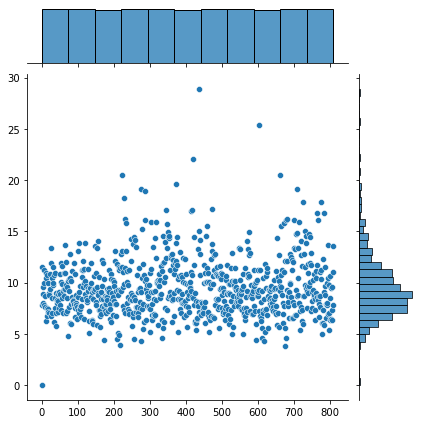

In [20]:
import seaborn as sb
sb.jointplot(x = np.arange(0,811,1), 
             y = data_norm_diff_prod1_sum,
            kind='scatter')
#plt.scatter(range(0,811),data_norm_diff_prod1_sum)

In [21]:
prod1_velocities = pd.DataFrame(data_norm_diff_prod1_sum**2, columns=["Vel_total_diff"])

In [22]:
prod1_velocities.sort_values(by="Vel_total_diff")

,Vel_total_diff
0,0.000000
677,14.628330
217,15.013300
618,18.251693
275,18.703030
...,...
224,420.442722
662,420.442722
420,487.733974
604,646.415370


In [23]:
def getWeeklyDiffs(products_sales_table):
    
    return products_sales_table.diff(axis=1).drop(products_sales_table.columns[0], axis=1).copy()

def getProductErrors(product_index, products_diffs):
    
    return products_diffs - products_diffs.iloc[product_index]
    
def getTotalSquaredError(per_product_error):
    
    return pd.DataFrame((per_product_error**2).sum(axis=1), columns=["Total Error"])
    
def makeProductVelErrorMatrix(products_diffs, nproducts):
    
    product_error_matrix = pd.DataFrame()
    
    for i in range(0,nproducts):
    
        product_errors_table = getProductErrors(i, product_diffs)
        
        product_errors_sumsq = getTotalSquaredError(product_errors_table)
        
        product_error_matrix[i] = product_errors_sumsq
        
    return product_error_matrix
        
        
    

In [24]:
product_diffs  = getWeeklyDiffs(data_norm)

In [25]:
error_matrix = makeProductVelErrorMatrix(product_diffs, 811)

ValueError: Cannot set a frame with no defined index and a value that cannot be converted to a Series

In [23]:
plt.figure(figsize=(15,15))

sb.heatmap(error_matrix, 
           square=True)

Using the sum of squared errors, there are not any readily discernible groupings. At least none we can see by eye. But then again, since these are the sumsof squares errors over the year, what we're really measuring is each products volatility throughout the year. Let's say, just for example, two products have the same exact average monthly sales rate. But one of them fluctuates more than the other, on a weekly basis. We'd be correct in purchasing together, if we had a monthly restocking scheddule. However the summed squared error score would tell us the opposite.

THus it might be better to consider the sales "displacement". In other words, we sum the signed errors over whatever time period we're interested in. Product pairs that have similar sales trajectories over that time period will thus have lower errors, as we want-- even if they fluctuate more on smaller timescales.

We'll need to write a slightly modified version of our 'getTotalSquaredError' function, so that it takes the signed error by default.

In [24]:
def getTotalSquaredError(per_product_error, signed = True):
    
    if signed == False:
        return pd.DataFrame((per_product_error**2).sum(axis=1), columns=["Total Error"])
    else:
        return pd.DataFrame((per_product_error).sum(axis=1)**2, columns=["Total Error"])

What if we use instead the sum of signed errors? This would rate products according how much their per-week sales changed over the course of the whole year.
In other words, two products both having a net sales gain of 10% of the whole year would be rated as similar. (The same would be true if they both had a net sales loss of 10%)

In [25]:
error_matrix_signed = makeProductVelErrorMatrix(product_diffs, 811)

plt.figure(figsize=(15,15))

sb.heatmap(error_matrix_signed, 
           square=True)

This new error matrix shows each product's net change in normalized sales, relative to the other products, over the whole year. 
In other words, darker colors indicate products that, over the course of a year, tended to vary together, in terms of sales increases or decreases. Brighter colors indicate products that didn't tend to vary together.

While still speculative, there seems to be a cluster of products (#1-200) that make up a "dark bloc" in the upper left of the matrix--- these products appear to be more closely related with each other. There is another, larger block, product #s 200-811, that also appear related, but the trend seems less uniform than with the smaller 。
 
This probably just indicates that the products, in the order they are given, are already somehow pre-catgorized. We would probably want to have more information about these categories before acting. Are they food vs. non-food items? Generic vs. brand-name?

In general, we can use a fine-tuned form of the method above, to determine perhaps smaller groupings of similar products. A similar approach can be applied on a per-month basis.
We could haven try clustering products based on the first 6 months of the year, then use the latter 6 months as a test case. It would be nice to have at least another year of data though.

# Experiment with PCA

Now that I've satisfied some curiosity, time to test out a more conventional approach.

 PCA is often used to reproject/compress data, so that it can be readily visualized. The idea is to find the eigenvectors of the covariance matrix--- if we order these vectors by their eigenvalues, we hope to find a set of convenient principal vectors. You can think of it has finding fixed "templates" that explain common trends in your data. However it only works well if there is some redundancy among your features. It's common practice to try and reduce the dimensionality down to 3 or 2, for easy visualization. There are cases though where this doesn't quite make sense, such as when the first 2 or 3 components don't explain a large fraction of the variance in your data.

We'll do a quick test, compressing as much variance as we can into 2 components.

In [26]:
from sklearn.decomposition import PCA

In [27]:
pca = PCA(n_components=3)

In [28]:
pca_data_norm = PCA(n_components=2)

In [29]:
pca_data_norm.fit_transform(data_norm.T)

array([[-1.56804138, -0.09906643],
       [-1.93720973, -0.01994318],
       [-1.90568552,  0.11366528],
       [-2.26152992,  0.71800689],
       [-1.64815863,  0.70008454],
       [-1.56075186,  0.70857899],
       [-2.15236617,  0.78263006],
       [-1.84761563,  0.79176718],
       [-2.02564987,  0.99982091],
       [-1.97935947,  0.95561224],
       [-2.49906771,  1.13113081],
       [-2.00744697,  0.98519346],
       [-1.64452841,  1.18789951],
       [-1.8382991 ,  1.03834748],
       [-1.23680718,  1.38717216],
       [-1.86569912,  1.91025884],
       [-2.1007806 ,  1.3609478 ],
       [-1.63977565,  2.01960353],
       [-1.40133429,  1.79547049],
       [-1.27163464,  1.58605514],
       [-1.46813703,  1.54030184],
       [-0.37032118,  1.88650526],
       [-0.17813527,  2.18335276],
       [ 0.46821462,  3.00434983],
       [ 2.28712703,  4.45446343],
       [ 5.00741212,  3.0662013 ],
       [ 0.59014749, -3.38588211],
       [ 0.44830262, -3.23693331],
       [ 0.2009487 ,

In [30]:
print(pca_data_norm.explained_variance_ratio_)
print(pca_data_norm.explained_variance_ratio_.sum())

[0.08654291 0.07679723]
0.1633401336373617


The difficulty so far is that PCA is not able to squeeze much variance into only 2 components, or even 3.
That's a problem because 3 is the most that we mere mortals can plot.

If we take a look at the variance ratio for the 1st component, 8.65%--- that implies that even though we don't get a nice clean dimension reduction, we can still do better than 811 dimensions.
Let's to a quick test, to see how many components we need to explain an arbitrary 90% of the variance:

At least 42 components needed to explain 90.0% of the variance.


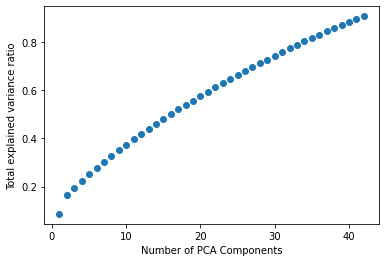

In [31]:
def determineNComponents(data, variance_threshold=0.90):
    
    n_components = 0
    sum_explained_variance = 0
    sum_list = []
    
    while sum_explained_variance < variance_threshold:
        n_components += 1
        pca_data_norm = PCA(n_components=n_components)
        pca_data_norm.fit_transform(data)
        sum_explained_variance = pca_data_norm.explained_variance_ratio_.sum()
        
        sum_list.append(sum_explained_variance)
        
    plt.scatter(np.arange(1,n_components+1,1),
               sum_list)
    plt.xlabel("Number of PCA Components")
    plt.ylabel("Total explained variance ratio")
    
    print("At least {} components needed to explain {}% of the variance.".format(n_components,variance_threshold*100))
                
    return n_components

min_components  = determineNComponents(data_norm.T)

We can compress our data from 811 to 42 dimensions, and still explain 99% of the variance. 
If we were dead-set getting a quick K-Means working model up and running, we could use this number as an intial guess of the number of K-means clusters.
Let's go ahead and try that.

First run PCA again with the optimal number of components we just determined. Then run K-means on a scatter plot of the first two PCA components.


In [32]:
pca_data_norm = PCA(n_components=2)
pca_data_norm.fit_transform(data_norm.T)

array([[-1.56805622, -0.09910973],
       [-1.93720604, -0.01984299],
       [-1.90564484,  0.11371816],
       [-2.26154907,  0.71792576],
       [-1.64815304,  0.70007956],
       [-1.56074059,  0.70845986],
       [-2.15238917,  0.78250119],
       [-1.84756789,  0.79182689],
       [-2.02568232,  0.99991743],
       [-1.9793749 ,  0.95577811],
       [-2.49904316,  1.13117391],
       [-2.00749593,  0.98509531],
       [-1.64452344,  1.18783772],
       [-1.83831224,  1.03840762],
       [-1.23682977,  1.38694467],
       [-1.86565366,  1.91047079],
       [-2.10077947,  1.36087007],
       [-1.63972127,  2.0197862 ],
       [-1.40140074,  1.7954217 ],
       [-1.27165208,  1.58604614],
       [-1.46815707,  1.54043408],
       [-0.37030417,  1.88649626],
       [-0.17813503,  2.18315733],
       [ 0.4682152 ,  3.00411059],
       [ 2.28717418,  4.45474154],
       [ 5.00741778,  3.06606121],
       [ 0.59016492, -3.38585568],
       [ 0.44830225, -3.23681947],
       [ 0.20094437,

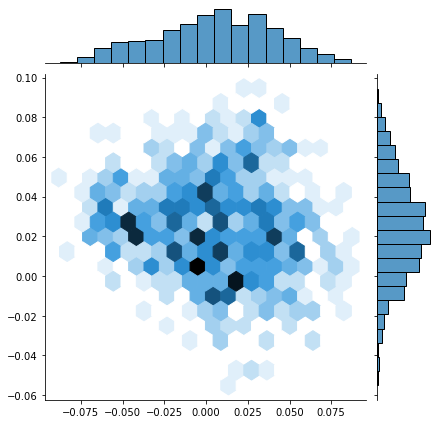

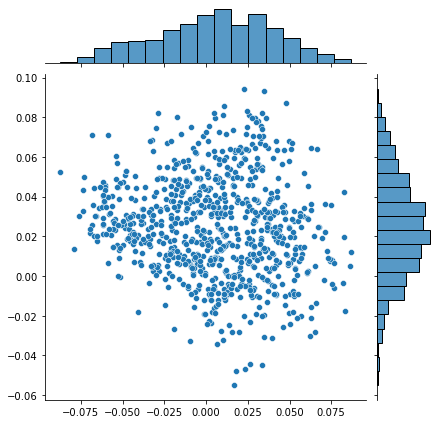

In [33]:
sb.jointplot(x=pca_data_norm.components_[0,:], 
             y=pca_data_norm.components_[1,:],
            kind='hex')
sb.jointplot(x=pca_data_norm.components_[0,:], 
             y=pca_data_norm.components_[1,:],
            kind='scatter')

In [34]:
components_data_norm = pca_data_norm.components_

In [35]:
from sklearn.cluster import KMeans  

In [36]:
kmeans = KMeans(n_clusters=min_components)  
kmeans.fit(data_norm)  

KMeans(n_clusters=42)

In [37]:
print(kmeans.cluster_centers_)  

[[ 2.90000000e-01  5.70000000e-01  2.90000000e-01 ...  4.30000000e-01
   7.10000000e-01  5.70000000e-01]
 [-5.55111512e-17  0.00000000e+00 -5.55111512e-17 ...  1.50000000e-01
   5.00000000e-02  5.00000000e-02]
 [ 2.05454545e-01  3.62727273e-01  2.94545455e-01 ...  5.09090909e-01
   3.44090909e-01  4.19090909e-01]
 ...
 [ 2.27500000e-01  8.25000000e-02  8.25000000e-02 ...  6.25000000e-02
   3.75000000e-01  6.47500000e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.65000000e-01  5.00000000e-01  1.65000000e-01 ...  0.00000000e+00
   0.00000000e+00  1.00000000e+00]]


Text(0.5, 0, '1st Princiapl Component')

Text(0.5, 0, '2nd Princiapl Component')

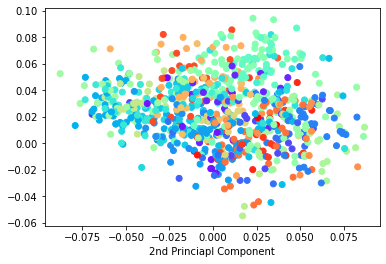

In [38]:
plt.scatter(x= components_data_norm[0,:],
            y= components_data_norm[1,:],
            c=kmeans.labels_, 
            cmap='rainbow') 

plt.xlabel("1st Princiapl Component")
plt.xlabel("2nd Princiapl Component")

None of the techniques applied so far give us a desirable degree of clustering among the proudcts. 
While k-means is happy to assign products to clusters for us, the results can often be nonsensical.

Not that this should be surprising. We already know that only 2 PCA components is insufficent. Thus even if the k-Means clustering worked well, such a PCA scatter plot may not show as much.

Getting a usable result my come down to the dimensionality reduction technique, not necessarily the clustering technique.
Other reprojection techniques like "Independent Component Analysis" (ICA), "Non-negative Matrix Factorization" (NMF), "t-Distributed Stochastic Neighbor Embedding" (t-SNE)
could also be tried, but there's no obvious indication that they would work better than PCA in this case. In my understanding, ICA in fact doesn't reduce dimensionality, rather it maximizes the independence between dimensions.

For the last experiment, I'll just do a quick demo of how TSNE could be applied. A major drawback of TSNE though is that it becomes harder to explain the physical meanin behind the output.

In [39]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)

In [40]:
components_tsne = tsne.fit_transform(data_norm)

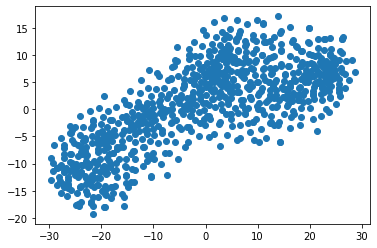

In [41]:
plt.scatter(x= components_tsne[:,0],
            y= components_tsne[:,1],
            cmap='rainbow') 

At least subjectively, it looks like there is more structure preserved in this 2D TSNE projection than in the top 2 PCA dimensions.
(We have to be careful though, as tSNE can sometimes induce artificial structure.)
Let's do a k-means clustering, adopting a rather hasty n-clusters of 3, just by visual inspection.

In [42]:
kmeans_tsne = KMeans(n_clusters=3, random_state=42)  
kmeans_tsne.fit(data_norm)  

KMeans(n_clusters=3, random_state=42)

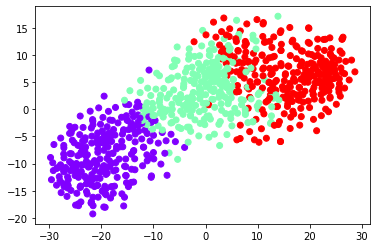

In [43]:
plt.scatter(x    = components_tsne[:,0],
            y    = components_tsne[:,1],
            cmap = 'rainbow',
            c    = kmeans_tsne.labels_) 

The cluster choices here appear reasonable, but what if we choose 42 clusters (following our PCA explained variance test), as before?

KMeans(n_clusters=42, random_state=42)

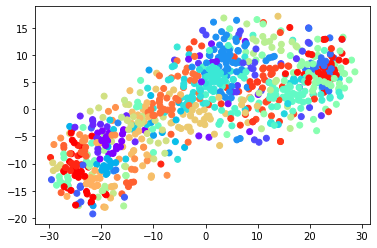

In [44]:
kmeans_tsne = KMeans(n_clusters=42, random_state=42)  
kmeans_tsne.fit(data_norm)  

plt.scatter(x    = components_tsne[:,0],
            y    = components_tsne[:,1],
            cmap = 'rainbow',
            c    = kmeans_tsne.labels_) 

Again we have somewhat of a mess. It's difficult to say whether the tSNE projection or the PCA projection better reflects the cluster assignments.
It would be up to an independent validation to say if these cluster choices are realistic. Perhaps a comparison with the actual human-assigned product categories? (Presumably such data is available...)
Alternatively the clusters could be used to inform hypothetical restocking orders for the coming weeks or months. One could then ask what affect on costs such a bundling strategy would have had. 

Of course, we could do such a test with the present data: cluster based on one half, test with the latter half, but this could prove challenging. 
    Any subset of the present data (1 calendar year) would have us training and testing on different seasons. More data is desired... at the very least, two calendar years.

### Conclusions:
    
* It may be possible to cluster products based on their net sales change over the year.
* This particular dataset seems difficult to compress to a human-readable number of dimensions
* PCA indicates we need at elast 42 dimensions to explain 90% of the total variance
* Applying k-means (with 4 clusters) on the top 2 PCA dimensions produces wildly overlapping clusters.
* Reducing dimensionality to 2 with t-SNE certainly gives a plot with more apparent structure, but it's difficult to determine if this is real are a tSNE artifact.

### Possible future work:

* Test the K-means clustering results by experiment: Use the assigned clusters to place virtual restocking orders throughout the coming year. Assess how such orders would have affected bottom line, if implemented.
* Approach the problem first as a sales prediction problem- maybe using the first half of the year to train, and the latter quarter to test, etc.
* It would be great to have more than a single year of data! Difficult to really model seasonal variations with only one example per calendar week.
* Any of the methods used here, even if implemented very well, will need to be considerably refined according to actual restocking criteria: period, volume, price limits, etc.
* Try categorizing by weeks, instead of items: cluster weeks with similar sales profiles, then recover the top selling items for those clusters. These top selling items can be integrated into the restocking strategy for those calendar weeks. (But we again come back to the data time-span limitation.)


# End